In [1]:
# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
# Load data Train
train_data = pd.read_csv('data_train.csv')

In [3]:
#Data Train preparation
X_train = train_data[['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']]
y_train = train_data['kategori']

In [4]:
#label encoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

In [5]:
#Load Data test
test_data = pd.read_csv('data_test.csv')

In [6]:
#Data Test Preparation
X_test = test_data[['pm_sepuluh', 'pm_duakomalima', 'sulfur_dioksida', 'karbon_monoksida', 'ozon', 'nitrogen_dioksida']]
y_test = test_data['kategori']

In [7]:
#Label Encoder
y_test_encoded = label_encoder.transform(y_test)


P Value = 1:

   K = 1:
      Accuracy for BAIK: 78.57%
      Accuracy for SEDANG: 95.80%
      Accuracy for TIDAK SEHAT: 93.02%
      Average Accuracy for K = 1: 92.80%

   K = 3:
      Accuracy for BAIK: 76.79%
      Accuracy for SEDANG: 97.71%
      Accuracy for TIDAK SEHAT: 88.37%
      Average Accuracy for K = 3: 93.35%

   K = 5:
      Accuracy for BAIK: 80.36%
      Accuracy for SEDANG: 97.71%
      Accuracy for TIDAK SEHAT: 95.35%
      Average Accuracy for K = 5: 94.74%

   K = 7:
      Accuracy for BAIK: 78.57%
      Accuracy for SEDANG: 97.33%
      Accuracy for TIDAK SEHAT: 88.37%
      Average Accuracy for K = 7: 93.35%

   K = 9:
      Accuracy for BAIK: 73.21%
      Accuracy for SEDANG: 96.95%
      Accuracy for TIDAK SEHAT: 88.37%
      Average Accuracy for K = 9: 92.24%

P Value = 2:

   K = 1:
      Accuracy for BAIK: 75.00%
      Accuracy for SEDANG: 95.04%
      Accuracy for TIDAK SEHAT: 90.70%
      Average Accuracy for K = 1: 91.41%

   K = 3:
      Accuracy for 

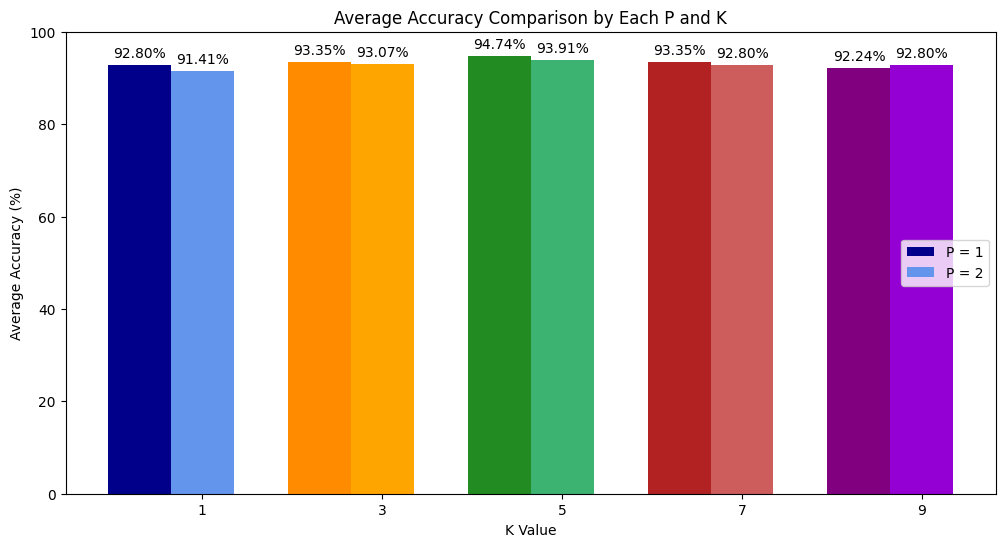

In [8]:
# Define Model KNN
unique_categories = np.unique(y_test)

# Initialize lists to store results for visualization
p_values = [1, 2]
n_values = [1, 3, 5, 7, 9]
average_accuracies = []

# Loop over values of k and p
for p_value in p_values:
    print(f'\nP Value = {p_value}:')
    accuracies_for_p = []
    for n_neighbors in n_values:
        model = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance', p=p_value)

        # Fit and predict
        model.fit(X_train, y_train_encoded)
        y_pred = model.predict(X_test)

        print(f'\n   K = {n_neighbors}:')
        for category in unique_categories:
            indices = np.where(y_test == category)
            category_accuracy = accuracy_score(y_test_encoded[indices], y_pred[indices])
            print(f'      Accuracy for {category}: {category_accuracy * 100:.2f}%')

        # Calculate and print average accuracy for each category
        average_accuracy = accuracy_score(y_test_encoded, y_pred)
        accuracies_for_p.append(average_accuracy * 100)
        print(f'      Average Accuracy for K = {n_neighbors}: {average_accuracy * 100:.2f}%')

    average_accuracies.append(accuracies_for_p)

# Visualization using grouped bar chart with contrasting colors
bar_width = 0.35
bar_positions_1 = np.arange(len(n_values))
bar_positions_2 = [pos + bar_width for pos in bar_positions_1]

plt.figure(figsize=(12, 6))

# Define contrasting colors for P=1 and P=2
colors_p1 = ['darkblue', 'darkorange', 'forestgreen', 'firebrick', 'purple']
colors_p2 = ['cornflowerblue', 'orange', 'mediumseagreen', 'indianred', 'darkviolet']

for i, p_value in enumerate(p_values):
    bars_1 = plt.bar(bar_positions_1, average_accuracies[i], width=bar_width,
                     label=f'P = {p_value}', color=colors_p1 if p_value == 1 else colors_p2)

    # Add labels to each bar
    for bar, accuracy in zip(bars_1, average_accuracies[i]):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1,
                 f'{accuracy:.2f}%', ha='center', va='bottom')

    bar_positions_1 = [pos + bar_width for pos in bar_positions_1]  # Shift the bar positions

plt.xlabel('K Value')
plt.ylabel('Average Accuracy (%)')
plt.title('Average Accuracy Comparison by Each P and K')
plt.ylim(0, 100)  # Set y-axis limit to 100
plt.xticks(bar_positions_2, n_values)  # Set x-axis ticks

# Move the legend to the upper left corner
plt.legend(loc='center right')

plt.show()

In [9]:
# Best Parameter
best_p = 1
best_k = 5

# Train Best Model
best_model = KNeighborsClassifier(n_neighbors=best_k, weights='uniform', p=best_p)
best_model.fit(X_train, y_train_encoded)


KNeighborsClassifier(p=1)

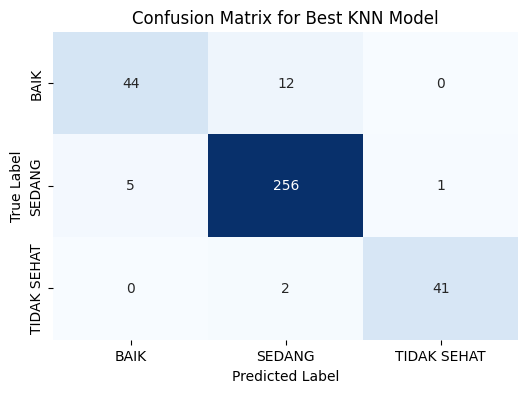

In [10]:
# Using the best model to make predictions on test data
y_pred = best_model.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test_encoded, y_pred)

# Heatmap confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix for Best KNN Model')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [11]:
# Save Model
joblib.dump(best_model, 'best_knn_model.joblib')

['best_knn_model.joblib']

In [ ]:
#0 = Baik
#1 = Sedang
#2 = Tidak Sehat